# 4.1 Exploratory Data Analysis

## 1. Load the dataset

In [1]:
# Import Standard dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

data = pd.read_csv("./cell2celltrain_Small_6k.csv")
data.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn
0,30.88,436,30,0.25,1,0,-112,0.1,11.0,0.3,...,8,No,0,150,No,2-High,Other,Other,Yes,Yes
1,44.83,172,45,0,0,0,-12,-15.5,0.3,0.3,...,7,No,0,80,No,2-High,Suburban,Other,No,No
2,42.63,838,50,0.74,5,0,28,-2.6,4.7,6.3,...,0,No,0,130,No,5-Low,Suburban,Other,?,No
3,33.49,358,50,0,0,0,-16,0,1.0,4.0,...,8,No,0,150,No,2-High,Town,Other,Yes,No
4,60.94,1276,60,4.7,0,0,-188,0.2,5.7,19.7,...,0,No,0,30,No,5-Low,Other,Other,?,No


## 2. Dataset shape, column and summary.

In [2]:
data.shape

(6380, 57)

In [3]:
# data.shape => The Dataset contains 6380 rows and 57 columns, a sufficiently large sample for machine learning modelling

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MonthlyRevenue             6380 non-null   object 
 1   MonthlyMinutes             6380 non-null   object 
 2   TotalRecurringCharge       6380 non-null   object 
 3   DirectorAssistedCalls      6380 non-null   object 
 4   OverageMinutes             6380 non-null   object 
 5   RoamingCalls               6380 non-null   object 
 6   PercChangeMinutes          6380 non-null   object 
 7   PercChangeRevenues         6380 non-null   object 
 8   DroppedCalls               6380 non-null   float64
 9   BlockedCalls               6380 non-null   float64
 10  UnsweredCalls              6380 non-null   float64
 11  CustomerCareCalls          6380 non-null   float64
 12  ThreewayCalls              6380 non-null   float64
 13  ReceivedCalls              6380 non-null   float

In [5]:
# data.info => The dataset includes a mix of numerical and categorical variables,
# requiring appporiate preprocessing such as encoding and imputation.

The size of the data is appropriate, consisting of 6,380 instances by 57 features,which is ideal for a machine learning task.
The data encompasses various aspects, ranging from usage of the service by the customers, billing, usage of the support department, among others.
When we look at the data by doing a `data.info()`, we can see that almost all the columns have complete data, except a few numerical ones that are
actually stored as object type. So we need to do a little preprocessing before modeling.
In summary, the data is big enough and is somewhat structured, but it is also in need of cleaning, encoding, and processing for integration into churn
prediction models.

In [6]:
data.describe()

,DroppedCalls,BlockedCalls,UnsweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,...,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,...,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000
mean,6.176693,4.068072,28.705878,1.806583,0.305000,115.784545,25.636787,8.204734,91.013276,68.777335,...,1.502821,1.346082,1.807680,1.560031,382.086207,0.036364,0.017555,0.052665,4.319592,0.055956
std,9.329839,9.756478,38.140535,4.445712,1.213215,175.121024,35.402182,16.581104,106.668454,95.513818,...,0.827205,0.630749,1.324284,0.889754,261.987590,0.200940,0.138313,0.257298,3.144514,0.339910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.700000,0.000000,5.300000,0.000000,0.000000,8.500000,3.300000,0.000000,22.700000,11.300000,...,1.000000,1.000000,1.000000,1.000000,202.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,16.300000,0.000000,0.000000,52.300000,13.700000,2.300000,62.300000,36.300000,...,1.000000,1.000000,1.000000,1.000000,329.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,7.700000,3.700000,37.300000,1.700000,0.300000,150.575000,34.300000,9.300000,121.700000,89.000000,...,2.000000,2.000000,2.000000,2.000000,513.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,166.300000,144.700000,663.300000,85.700000,43.000000,2692.400000,540.700000,344.700000,1591.000000,1399.300000,...,10.000000,9.000000,19.000000,10.000000,1695.000000,4.000000,3.000000,7.000000,9.000000,9.000000


### Summary Statistics Analysis:

An evaluation of summary statistics for the numerical variable was undertaken to clarify the distribution and quantity of notable qualities.
The Dataset contains 24 numeric attributes related to call activity, account information, device usage, and retention behaviour.
All numerical fields have a complete set of 6380 entries, indicating no missing value However stil gonna check the missing value further up.

The results show large variation and right-skewed distributions in many features. For example, DroppedCalls, BlockedCalls, ReceivedCalls, and
PeakCallsInOut have medians that are much lower than their maximum values (e.g., ReceivedCalls median = 52.3 vs. max = 2,692.4). 
This indicates the presence of outliers, where a small number of customers make unusually high numbers of calls. 
These extreme values may provide useful information for identifying churn patterns.

Several variables also contain mostly zero values, such as RetentionCalls, RetentionOffersAccepted, and ReferralsMadeBySubscriber. These behaviours
are rare but may still contribute to churn prediction.

One variable, CurrentEquipmentDays, includes a minimum value of –3, which may indicate a recording error or a special coded value. 
This will be addressed during preprocessing. Overall, the summary statistics show significant variability and skewness in customer behaviour, 
which will be considered in later preprocessing and modelling stages.



In [7]:
#The describe() method returns description of the data in the DataFrame.

# If the DataFrame contains numerical data, the description contains these information for each column:

# count - The number of not-empty values.
# mean - The average (mean) value.
# std - The standard deviation.
# min - the minimum value.
# 25% - The 25% percentile*.
# 50% - The 50% percentile*.
# 75% - The 75% percentile*.
# max - the maximum value.
#(www.w3schools.com, n.d.)

In [8]:
print(data.columns)

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnsweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
  

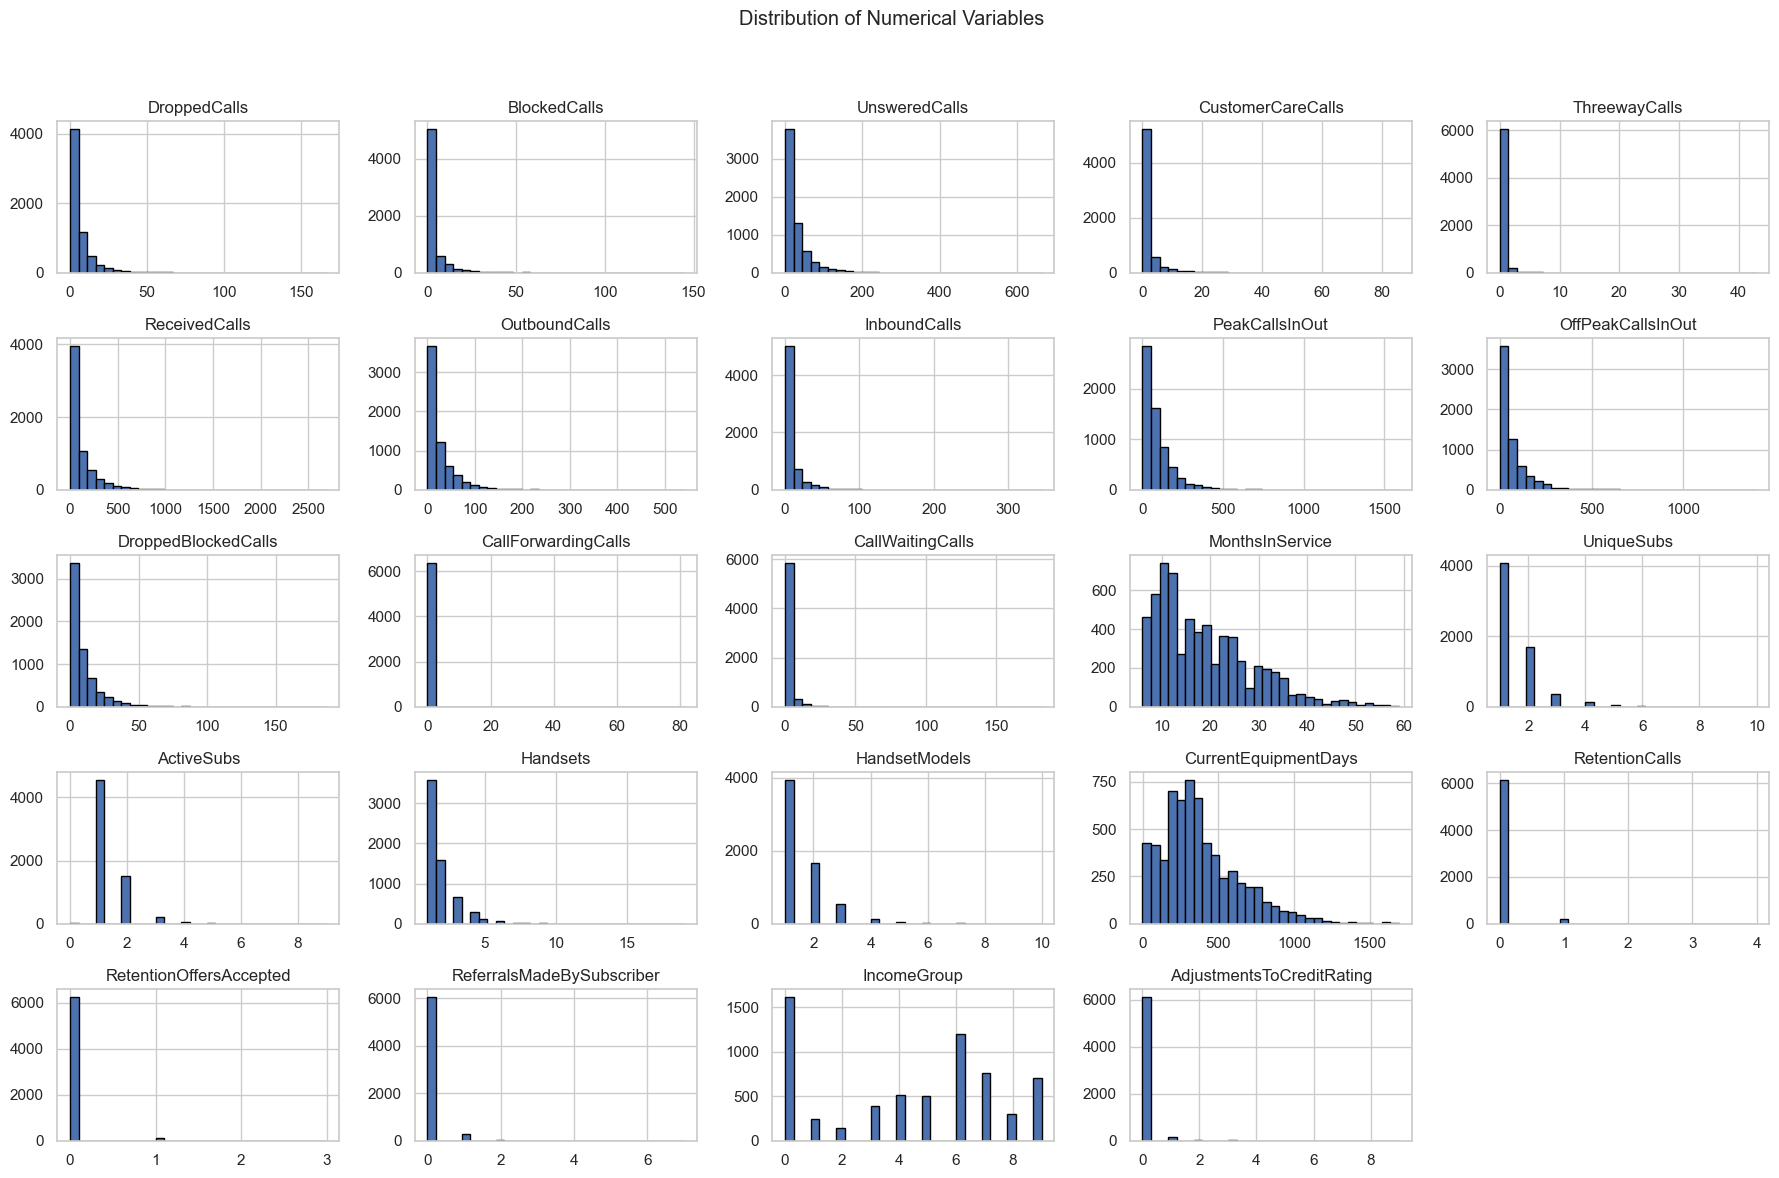

In [9]:
# ----Distribution of numerical variables----
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

data[num_cols].hist(bins=30, figsize=(18,12), edgecolor='black')
plt.suptitle("Distribution of Numerical Variables")
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


In [10]:
# missing value
data.isna().sum()

MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnsweredCalls                0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetW

## Missing value:

A missing value analysis was carried out to assess the completeness of the dataset. The result shows that dataset contain zero missing entries, meaning 
dataset fully complete and does not require any imputation.

However in many dataset entries contain `"?"` to represent missing imformation. These can converted into proper missing values `(NAN)` argument while loading the data. 

In [11]:
# Replace the "?" into the "NAN" 
data = pd.read_csv("./cell2celltrain_Small_6k.csv", na_values=['?'])
data.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn
0,30.88,436.0,30.0,0.25,1.0,0.0,-112.0,0.1,11.0,0.3,...,8,No,0,150.0,No,2-High,Other,Other,Yes,Yes
1,44.83,172.0,45.0,0.00,0.0,0.0,-12.0,-15.5,0.3,0.3,...,7,No,0,80.0,No,2-High,Suburban,Other,No,No
2,42.63,838.0,50.0,0.74,5.0,0.0,28.0,-2.6,4.7,6.3,...,0,No,0,130.0,No,5-Low,Suburban,Other,NaN,No
3,33.49,358.0,50.0,0.00,0.0,0.0,-16.0,0.0,1.0,4.0,...,8,No,0,150.0,No,2-High,Town,Other,Yes,No
4,60.94,1276.0,60.0,4.70,0.0,0.0,-188.0,0.2,5.7,19.7,...,0,No,0,30.0,No,5-Low,Other,Other,NaN,No


In [12]:
data.shape

(6380, 57)

In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MonthlyRevenue             6359 non-null   float64
 1   MonthlyMinutes             6359 non-null   float64
 2   TotalRecurringCharge       6359 non-null   float64
 3   DirectorAssistedCalls      6359 non-null   float64
 4   OverageMinutes             6359 non-null   float64
 5   RoamingCalls               6359 non-null   float64
 6   PercChangeMinutes          6338 non-null   float64
 7   PercChangeRevenues         6338 non-null   float64
 8   DroppedCalls               6380 non-null   float64
 9   BlockedCalls               6380 non-null   float64
 10  UnsweredCalls              6380 non-null   float64
 11  CustomerCareCalls          6380 non-null   float64
 12  ThreewayCalls              6380 non-null   float64
 13  ReceivedCalls              6380 non-null   float

In [14]:
data.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn
0,30.88,436.0,30.0,0.25,1.0,0.0,-112.0,0.1,11.0,0.3,...,8,No,0,150.0,No,2-High,Other,Other,Yes,Yes
1,44.83,172.0,45.0,0.00,0.0,0.0,-12.0,-15.5,0.3,0.3,...,7,No,0,80.0,No,2-High,Suburban,Other,No,No
2,42.63,838.0,50.0,0.74,5.0,0.0,28.0,-2.6,4.7,6.3,...,0,No,0,130.0,No,5-Low,Suburban,Other,NaN,No
3,33.49,358.0,50.0,0.00,0.0,0.0,-16.0,0.0,1.0,4.0,...,8,No,0,150.0,No,2-High,Town,Other,Yes,No
4,60.94,1276.0,60.0,4.70,0.0,0.0,-188.0,0.2,5.7,19.7,...,0,No,0,30.0,No,5-Low,Other,Other,NaN,No


In [15]:
data.describe()


,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
count,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6338.000000,6338.000000,6380.000000,6380.000000,...,6380.000000,6380.000000,6270.000000,6270.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,2781.000000
mean,59.130495,531.206794,47.092625,0.973702,40.096556,1.154804,-9.410066,-0.923541,6.176693,4.068072,...,1.560031,382.086207,31.128230,21.175120,0.036364,0.017555,0.052665,4.319592,0.055956,83.531104
std,43.571333,548.862582,24.073053,3.084585,94.725405,5.464669,253.659969,37.558534,9.329839,9.756478,...,0.889754,261.987590,22.231625,24.098821,0.200940,0.138313,0.257298,3.144514,0.339910,62.879709
min,-6.170000,0.000000,-6.000000,0.000000,0.000000,0.000000,-2458.000000,-552.400000,0.000000,0.000000,...,1.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,33.595000,157.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-7.200000,0.700000,0.000000,...,1.000000,202.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
50%,48.560000,366.000000,45.000000,0.250000,2.000000,0.000000,-4.000000,-0.300000,3.000000,1.000000,...,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,60.000000
75%,71.980000,719.500000,60.000000,0.990000,40.000000,0.200000,67.000000,1.800000,7.700000,3.700000,...,2.000000,513.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000,150.000000
max,776.270000,7359.000000,400.000000,159.390000,2278.000000,144.600000,2398.000000,741.100000,166.300000,144.700000,...,10.000000,1695.000000,98.000000,98.000000,4.000000,3.000000,7.000000,9.000000,9.000000,500.000000


In [16]:
print(data.columns)

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnsweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
  

## Distribution of Key Numerical Variables (Histograms )

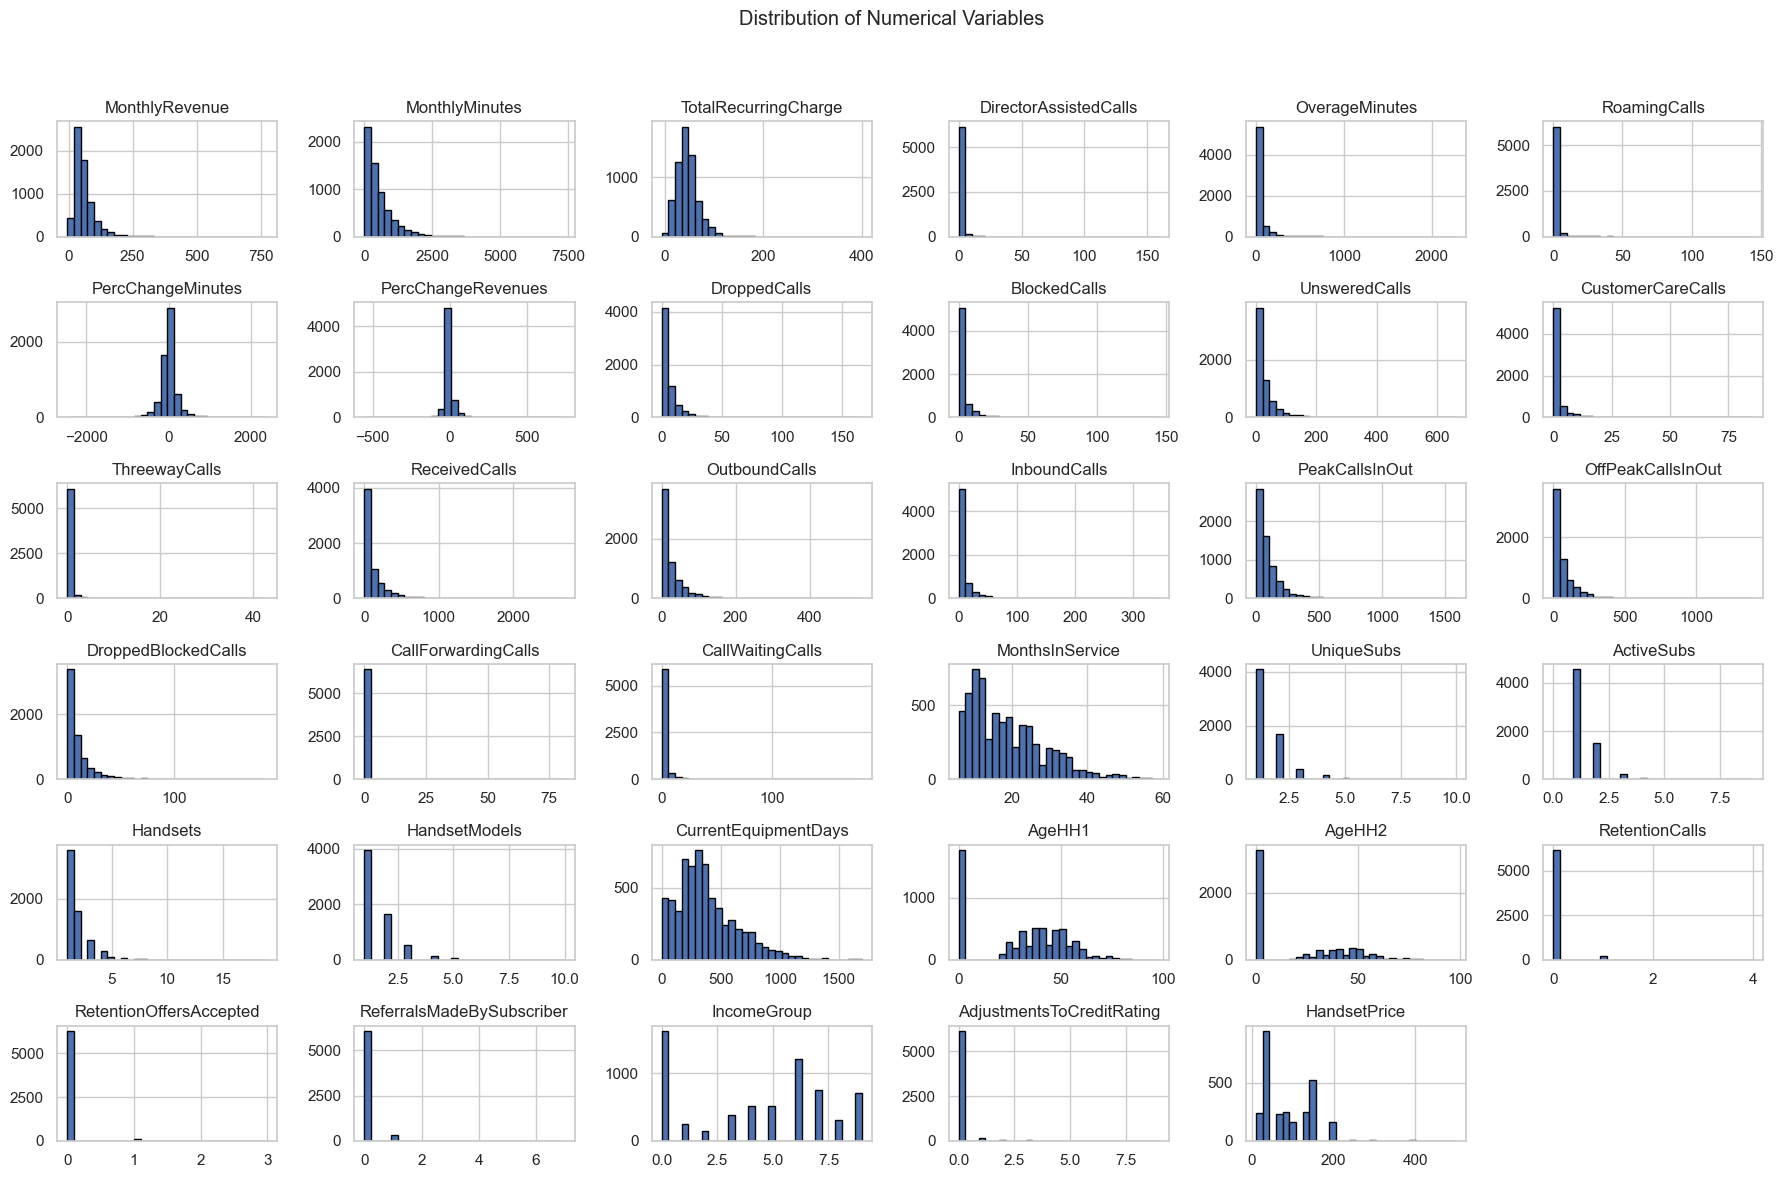

In [17]:
# ----Distribution of numerical variables----
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

data[num_cols].hist(bins=30, figsize=(18,12), edgecolor='black')
plt.suptitle("Distribution of Numerical Variables")
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()



In the histograms for the call-related variables, it is observed that there is an equal distribution for the majority part of the users with very few incidents of dropped calls, blocked calls, and customer care inquiries, but a few users with substantial numbers. This shows up as right-skewed curves with outliers in the histogram.
Customers experiencing a higher rate of dropped and blocked calls, as well as those that frequent customer care services, are most likely to experience service issues. This shows that there is a trend among consumers expressing their discontent with service quality, which in itself shows a high correlation with the likelihood of having a customer churn. Simply put, service reliability and call performance are essential in retaining a customer.

## Months in Service vs Monthly Revenue by Churn (Histogram)

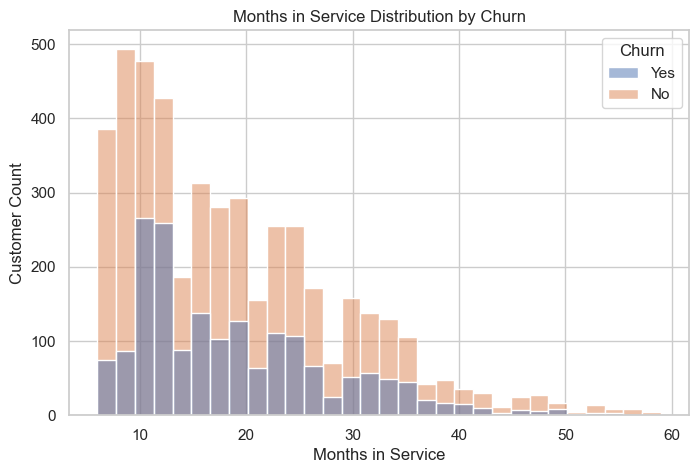

In [18]:
# ---- EDA: Tenure (MonthsInService) distribution by churn ----
plt.figure(figsize=(8,5))
sns.histplot(
    data=data,
    x='MonthsInService',
    hue='Churn',
    bins=30
)
plt.title("Months in Service Distribution by Churn")
plt.xlabel("Months in Service")
plt.ylabel("Customer Count")
plt.show()


The histogram shows that customers who churn are more concentrated in the early months of service, while customers with longer service duration are more likely to remain with the company.  It can be seen that as months in service increase, the share of customers churning decreases noticeably.

Put simply, churn is most possible at the beginning of the customer lifecycle. The ones that last longer tend to create some loyalty and are less likely to churn. So, investing in creating a solid early experience will be one of the important strategies for reducing churn.

## Months in Service vs Monthly Revenue by Churn (ScatterPlot)

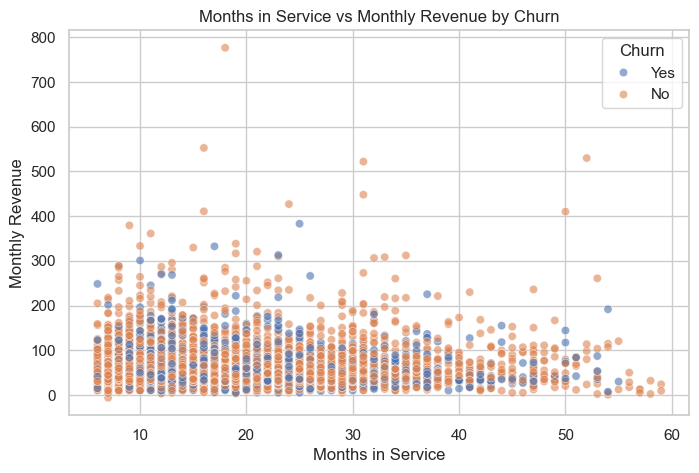

In [19]:
# Relationship between Months in Service  and Monthly Revenue by Churn----
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=data,
    x='MonthsInService',
    y='MonthlyRevenue',
    hue='Churn',
    alpha=0.6
)
plt.title("Months in Service vs Monthly Revenue by Churn")
plt.xlabel("Months in Service")
plt.ylabel("Monthly Revenue")
plt.show()


Scattered plot show that the customers with low tenure usually generate low average monthly revenue, which also has a tendency to churn. While the customers with high tenure usually generate high, stable average monthly revenue and less likely to churn.
This would suggest that early-stage customers contribute less financially and have a greater risk of churning. Increasing engagement and offering specific incentives in the first few months may help raise retention and revenues in the longer run.

## Summary Statistics Analysis:

The analysis shows that many numerical variables are highly skewed, with a small number of customers generating very high usage while most have low values. Call-related features such as DroppedCalls, BlockedCalls, and CustomerCareCalls are higher for churned customers, indicating that poor service quality is strongly linked to churn.

Also, customers with shorter periods of service tend to churn more, while customers with longer periods of service tend to be more reliable and thus less likely to churn. Overall, the primary reason for churn, therefore, is related to service issues, difficulties, and inconsistencies, especially while serving and usage patterns


In [20]:
# check the null value.
data.isna().sum()


MonthlyRevenue                 21
MonthlyMinutes                 21
TotalRecurringCharge           21
DirectorAssistedCalls          21
OverageMinutes                 21
RoamingCalls                   21
PercChangeMinutes              42
PercChangeRevenues             42
DroppedCalls                    0
BlockedCalls                    0
UnsweredCalls                   0
CustomerCareCalls               0
ThreewayCalls                   0
ReceivedCalls                   0
OutboundCalls                   0
InboundCalls                    0
PeakCallsInOut                  0
OffPeakCallsInOut               0
DroppedBlockedCalls             0
CallForwardingCalls             0
CallWaitingCalls                0
MonthsInService                 0
UniqueSubs                      0
ActiveSubs                      0
ServiceArea                     3
Handsets                        0
HandsetModels                   0
CurrentEquipmentDays            0
AgeHH1                        110
AgeHH2        

## Missing value:

After changing the `"?"` symbols into correct null values, a check for missing values was done. A few features were found to have their data missing. Most of the call related or usage variables, such as MonthlyRevenue, MonthlyMinutes, TotalRecurringCharge, DirectorAssistedCalls, OverageMinutes, and RoamingCalls have 21 missing values each. At the same time, PercChangeMinutes and PercChangeRevenues have 42 entries missing. The demographical fields, such as AgeHH1 and AgeHH2, are missing approximately 110. There are 3 entries for ServiceArea and 2,121 entries for Homeownership. This suggests that a lot of customers don't have information about whether they own a home. The variable with most missing entries is HandsetPrice with 3,599 entries missing Because there are missing values in both numerical and categorical variables, we will apply median imputation on numerical features and fill in the categorical variables with the mode, which is the most common value, in order to keep things consistent for modelling.




In [21]:
# Distribution of values in churn
data['Churn'].value_counts()
data['Churn'].value_counts(normalize=True) * 100


Churn
No     71.61442
Yes    28.38558
Name: proportion, dtype: float64

## Churn Distribution:

There is show a clear class imbalance in the target variable Churn. About `71.6%` of customers are marked as "No" (retained), and `28.4%` are marked as "Yes" (churned). This difference shows that there are more than twice as many retained customers as there are churned customers. If not fixed, machine learning models may Favor predicting the majority class.
This imbalance is important because machine learning models can become biased towards predicting the majority class. Without appropriate adjustment, model may attain high accuracy solely by predicting that majority of customer will remain, while failing to identify the customers who are likely to churn.
To fix this, the dataset will be balanced during preprocessing using `SMOTE (Synthetic Minority Oversampling Technique)` will be used to increase the number of churn cases by generating examples of the minority class. 


# Step 4.2 - Data Preprocessing
For machine learning algorithms to work, it's necessary to convert raw data into clean dataset, which we need to convert data set to numeric data.
we can accomplish this by converting all of the categorical names to column vectors that have only `0s` and `1s`. It needs to either drop the missing rows or fill them up with a mean or estimated numbers.


## 4.2 Missing Value Imputation


In [22]:
"""
  Replace all `?` with NaN, just for the safest side , i used the possible scenario of spaces in `?` mark as it replaced earlier
  but maybe because of spaces it haven't done properly .

"""
data = data.replace('?', np.nan).replace(' ?', np.nan).replace('  ?', np.nan)

# Fill the missing value, first the numeric values.
num_columns = ['MonthlyRevenue','MonthlyMinutes','TotalRecurringCharge',
            'DirectorAssistedCalls','OverageMinutes','RoamingCalls',
            'PercChangeMinutes','PercChangeRevenues',
            'AgeHH1','AgeHH2','HandsetPrice']

for column in num_columns:
    data[column] = data[column].astype(float)   
    data[column] = data[column].fillna(data[column].median())


In [23]:
# Categrical columns

cat_columns = ['ServiceArea', 'Homeownership', 'MaritalStatus']

for columns in cat_columns:
    data[columns] = data[columns].fillna(data[columns].mode()[0])

In [24]:
# check the missing value now. 
data.isna().sum()

MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnsweredCalls                0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetW

# Step 4.2 - Encoding 

 
Label encoding is a basic yet important technique in data preprocessing that transforms categorical values like names or categories into numbers. 
This conversion is essential because most machine learning algorithms can only work with numerical data. By assigning a unique number to each category,
label encoding helps ensure that the data can be effectively used to train and build machine learning models.

(GeeksforGeeks, 2018)


In [25]:
Data = pd.DataFrame(data)
display(Data)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn
0,30.88,436.0,30.0,0.25,1.0,0.0,-112.0,0.1,11.0,0.3,...,8,No,0,150.0,No,2-High,Other,Other,Yes,Yes
1,44.83,172.0,45.0,0.00,0.0,0.0,-12.0,-15.5,0.3,0.3,...,7,No,0,80.0,No,2-High,Suburban,Other,No,No
2,42.63,838.0,50.0,0.74,5.0,0.0,28.0,-2.6,4.7,6.3,...,0,No,0,130.0,No,5-Low,Suburban,Other,Yes,No
3,33.49,358.0,50.0,0.00,0.0,0.0,-16.0,0.0,1.0,4.0,...,8,No,0,150.0,No,2-High,Town,Other,Yes,No
4,60.94,1276.0,60.0,4.70,0.0,0.0,-188.0,0.2,5.7,19.7,...,0,No,0,30.0,No,5-Low,Other,Other,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,30.48,242.0,40.0,0.50,0.0,0.0,-9.0,0.5,6.0,9.7,...,6,No,0,60.0,No,7-Lowest,Town,Professiol,Yes,No
6376,66.17,559.0,45.0,0.00,80.0,0.6,548.0,59.3,3.0,1.3,...,7,No,0,60.0,No,2-High,Suburban,Other,Yes,No
6377,99.61,1147.0,60.0,1.73,101.0,0.0,-414.0,-29.6,19.0,1.3,...,8,No,0,100.0,No,5-Low,Other,Other,Yes,No
6378,103.63,891.0,65.0,0.74,125.0,0.2,298.0,75.7,12.0,1.3,...,0,No,0,10.0,No,5-Low,Suburban,Other,Yes,Yes


In [26]:
# Using pandas - get_dummies() method
data_encoded = pd.get_dummies(data, drop_first=True)

In [27]:
display(data_encoded)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professiol,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Yes,Churn_Yes
0,30.88,436.0,30.0,0.25,1.0,0.0,-112.0,0.1,11.0,0.3,...,False,False,False,True,False,False,False,False,True,True
1,44.83,172.0,45.0,0.00,0.0,0.0,-12.0,-15.5,0.3,0.3,...,False,False,False,True,False,False,False,False,False,False
2,42.63,838.0,50.0,0.74,5.0,0.0,28.0,-2.6,4.7,6.3,...,False,False,False,True,False,False,False,False,True,False
3,33.49,358.0,50.0,0.00,0.0,0.0,-16.0,0.0,1.0,4.0,...,True,False,False,True,False,False,False,False,True,False
4,60.94,1276.0,60.0,4.70,0.0,0.0,-188.0,0.2,5.7,19.7,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,30.48,242.0,40.0,0.50,0.0,0.0,-9.0,0.5,6.0,9.7,...,True,False,False,False,True,False,False,False,True,False
6376,66.17,559.0,45.0,0.00,80.0,0.6,548.0,59.3,3.0,1.3,...,False,False,False,True,False,False,False,False,True,False
6377,99.61,1147.0,60.0,1.73,101.0,0.0,-414.0,-29.6,19.0,1.3,...,False,False,False,True,False,False,False,False,True,False
6378,103.63,891.0,65.0,0.74,125.0,0.2,298.0,75.7,12.0,1.3,...,False,False,False,True,False,False,False,False,True,True


## 4.2 Apply SMOTE properly.


when a dataset has more samples of one class and very few of another, the model tends to predict the majority class more often. 
This problem is called class imbalance. The Synthetic Minority Over-sampling Technique(SMOTE) makes new synthetic samples for the
smaller(Minority) class. This makes the dataset more balanced and helps the model learn both classes properly.
SMOTE creates new synthetic data instead of copying existing samples.
(GeeksforGeeks, 2024)

In [28]:
# 1.Split X and y

X = data_encoded.drop('Churn_Yes', axis=1)
y = data_encoded['Churn_Yes']


In [29]:
X

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,PrizmCode_Suburban,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professiol,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Yes
0,30.88,436.0,30.0,0.25,1.0,0.0,-112.0,0.1,11.0,0.3,...,False,False,False,False,True,False,False,False,False,True
1,44.83,172.0,45.0,0.00,0.0,0.0,-12.0,-15.5,0.3,0.3,...,True,False,False,False,True,False,False,False,False,False
2,42.63,838.0,50.0,0.74,5.0,0.0,28.0,-2.6,4.7,6.3,...,True,False,False,False,True,False,False,False,False,True
3,33.49,358.0,50.0,0.00,0.0,0.0,-16.0,0.0,1.0,4.0,...,False,True,False,False,True,False,False,False,False,True
4,60.94,1276.0,60.0,4.70,0.0,0.0,-188.0,0.2,5.7,19.7,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,30.48,242.0,40.0,0.50,0.0,0.0,-9.0,0.5,6.0,9.7,...,False,True,False,False,False,True,False,False,False,True
6376,66.17,559.0,45.0,0.00,80.0,0.6,548.0,59.3,3.0,1.3,...,True,False,False,False,True,False,False,False,False,True
6377,99.61,1147.0,60.0,1.73,101.0,0.0,-414.0,-29.6,19.0,1.3,...,False,False,False,False,True,False,False,False,False,True
6378,103.63,891.0,65.0,0.74,125.0,0.2,298.0,75.7,12.0,1.3,...,True,False,False,False,True,False,False,False,False,True


In [30]:
y

0        True
1       False
2       False
3       False
4       False
        ...  
6375    False
6376    False
6377    False
6378     True
6379    False
Name: Churn_Yes, Length: 6380, dtype: bool

In [31]:
# 2. Train-test split

# Install libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    X, y , test_size=0.2 , random_state=42, stratify=y) # stratify keeps churn ratio consisitent in test set.

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


In [32]:
y_train_resampled.value_counts()


Churn_Yes
False    3655
True     3655
Name: count, dtype: int64

The data showed a clear imbalance, the non-churn customers were much more than the churned ones. This can create skew for the machine learning models, where all predictions would go to the majority class. For that, SMOTE-balancing needed to be done.

First, features `X` and target `y` were separated, then the data was divided into training and testing sets, using stratification to preserve the original churn ratio in the test set. Only in the training data was SMOTE applied, aiming at the generation of synthetic examples for the minority churn class.

These two classes then were balanced after the resampling. Since most models learn the patterns of churn better, it improves the recall and hence the overall performance will also be fairer.

# Step 4.4 Features Scalling (Standardization)

`StandardScaler` is a method for scale features that follows Standard Normal Distribution (SND) and is used to make sure that
all number features have values that are consistent.It transforms data so that the `mean` becomes `0` and the standard deviation
becomes `1`. It’s ideal for algorithms like SVM, logistic regression or neural networks that assume data is normally distributed.

(scikit-learn, 2019)

In [33]:
# Import the StandardScaler library

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

X_train_scaler = standard_scaler.fit_transform(X_train_resampled)

X_test_scaler = standard_scaler.transform(X_test)


In [34]:
X_train_scaler

array([[-1.13373725, -0.70628271, -1.61375205, ...,  6.64254897,
        -0.10112687,  0.4776595 ],
       [-0.68126558, -0.67633113, -0.28298392, ..., -0.15054462,
        -0.10112687, -2.09354151],
       [-0.68924744, -0.64825153, -0.7265733 , ..., -0.15054462,
        -0.10112687,  0.4776595 ],
       ...,
       [-0.42039264, -0.24113646, -0.11106165, ..., -0.15054462,
        -0.10112687,  0.4776595 ],
       [-0.13160046, -0.96274305,  0.60419483, ..., -0.15054462,
        -0.10112687,  0.4776595 ],
       [-0.51904569,  0.47226186, -0.02499849, ..., -0.15054462,
        -0.10112687,  0.4776595 ]])

In [35]:
X_test_scaler

array([[-0.54856717, -0.17651426, -0.06118923, ..., -0.15054462,
        -0.10112687, -2.09354151],
       [ 1.11614943,  0.38507773,  1.04778421, ..., -0.15054462,
        -0.10112687,  0.4776595 ],
       [ 1.32392721,  1.19002625,  2.6890649 , ..., -0.15054462,
        -0.10112687,  0.4776595 ],
       ...,
       [-0.08886194, -0.53406116, -0.7265733 , ..., -0.15054462,
        -0.10112687,  0.4776595 ],
       [-0.69348781, -0.80175335, -0.28298392, ..., -0.15054462,
        -0.10112687, -2.09354151],
       [-0.1699277 , -0.73997823,  0.60419483, ..., -0.15054462,
        -0.10112687,  0.4776595 ]])

What this code do

Feature scaling was used to make all the numbers to the same size before using training methods that are sensitive to 
feature size, such as Logistic Regression. Standardscaler used to change the data so that `mean was zero` and the `standard deviation was `one`.
It only used the resampled training data to fit the scaler and make sure no information got out. Then applied it to the test data. 
It used unscaled data to train the tree-based models, since they don't need to be scaled.

In [36]:
'''
What this code does

StandardScaler converts each numeric feature to:

`mean = 0`

`standard deviation = 1`

Scaling is applied after SMOTE, so synthetic samples are also scaled.

Only the training data is used to fit the scaler → prevents data leakage.

Logistic Regression uses scaled data:

`X_train_scaled, y_train_resampled`

`X_test_scaled`

Tree models (Random Forest, Gradient Boosting) use unscaled data:

`X_train_resampled, y_train_resampled`

`X_test`
'''

'\nWhat this code does\n\nStandardScaler converts each numeric feature to:\n\n`mean = 0`\n\n`standard deviation = 1`\n\nScaling is applied after SMOTE, so synthetic samples are also scaled.\n\nOnly the training data is used to fit the scaler → prevents data leakage.\n\nLogistic Regression uses scaled data:\n\n`X_train_scaled, y_train_resampled`\n\n`X_test_scaled`\n\nTree models (Random Forest, Gradient Boosting) use unscaled data:\n\n`X_train_resampled, y_train_resampled`\n\n`X_test`\n'

# Step 4.5 Features Selection using Random Forest Feature

A random forest is a type of meta estimator that fits many decision tree models on different sub-samples of the dataset. It uses 
averaging to improve the predictive accuracy and control over-fitting.

In [37]:
from sklearn.ensemble import RandomForestClassifier


Rdm_clf = RandomForestClassifier(random_state=42)
Rdm_clf.fit(X_train_resampled, y_train_resampled)

# Extract feature importances
importances = Rdm_clf.feature_importances_

# Creating the dataframe for better visualisation
feature_importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': importances
})

# Sort by importanc
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df.head(15)



,Feature,Importance
26,CurrentEquipmentDays,0.038017
21,MonthsInService,0.032753
1,MonthlyMinutes,0.031487
6,PercChangeMinutes,0.031481
27,AgeHH1,0.031234
7,PercChangeRevenues,0.029788
0,MonthlyRevenue,0.027938
17,OffPeakCallsInOut,0.027553
10,UnsweredCalls,0.027245
16,PeakCallsInOut,0.027204


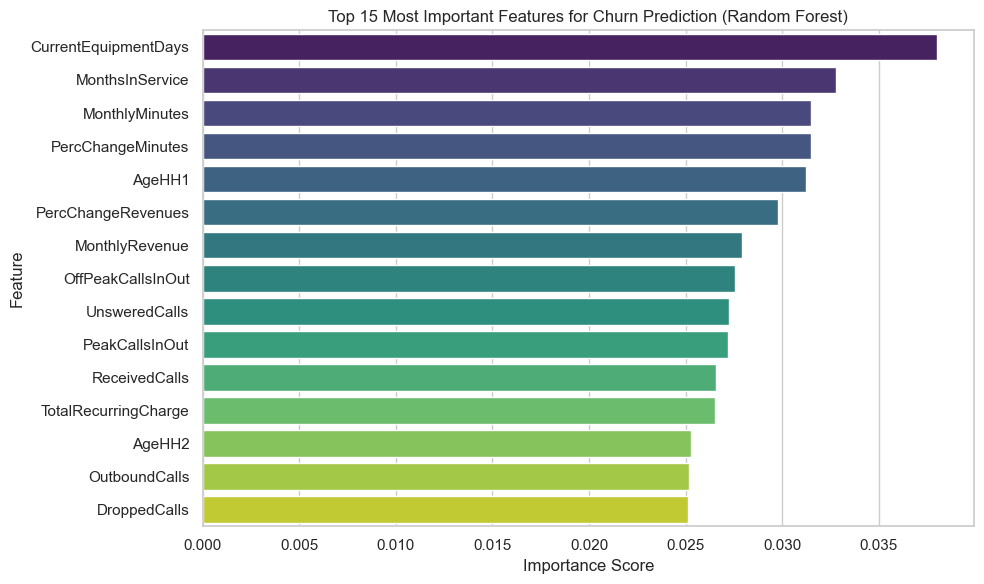

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take top 15 most important features
top_features = feature_importance_df.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features['Importance'], y=top_features['Feature'], hue=top_features['Feature'], palette='viridis')
plt.title("Top 15 Most Important Features for Churn Prediction (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


A feature importance analysis was performed using a Random forest classifier the variable that contributes most to predicting customer churn. The results show that variables such as CurrentEquipmentDays, MonthsInService, MonthlyMinutes, PercChangeMinutes, and the various age variables are highly predictive. This implies that the age of the device, the tenure of the customer with us, usage levels, and overall levels of engagement with the product are all highly influential of churn.

## 4.6 Model selection & Evaluation


Three machine learning models gonna use for evaluating customer churn: `Logistic Regression`, `Random Forest` and `Gradient Boosting`.

`Logistic Regression` was selected as a baseline model because it is simple, easy to understand, and can give probability estimates. 

`Random Forest` was added as a strong ensemble method that can represent non-linear realtionship and give information about the relevance of features.

`Gradient Boosting` was added for its strong predictive performance and ability to capture complex patterns in the data. 

Together, these methods work together to give a balanced evaluation across interpretability, robustness and accuracy.

Logistic Regression and Random Forest were used earlier only as part of the preprocessing workflow. Logistic Regression helped identify 
the need for features scaling beacause it is sensitive to unscaled features.Random Forest utilized to figure out how important each attribute
was so that the most important predictors of churn could be found. These early usage were mainly for preparing data and features selection only, not for `final model training and evaluation`.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# 1. Logistic Regression 
log_reg = LogisticRegression(max_iter=1000, random_state=42) # max_iter = Maximum number of times the algorithm is allowed to try and learn.

# 2. Random Forest
rdm_frst = RandomForestClassifier(random_state=42) # random state use to the numbrers doesn't change.

# 3. Gradient Boosting
grd_bost = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=2 ,random_state=42)


In [40]:
# Now it can do 2 ways - First it can be done individually or Second it can be done by creating the class. 
# Second option can be much clearner.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Creating the class

def evaluate_model(model, X_train, y_train, X_test, y_test ):

   # Train the model
    model.fit(X_train, y_train)

   # Predicition
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

   # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

   # 10-fold Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1') # cv is like how many folds.
    cv_mean = cv_scores.mean()

    
    return {
        'Accuracy (%)': accuracy * 100,
        'Precision (%)': precision * 100,
        'Recall (%)': recall * 100,
        'F1 Score (%)': f1 * 100,
        'ROC-AUC (%)': auc * 100,
        'CV F1 (Mean %)': cv_mean * 100
    }


In [41]:
# 1.logistic Regression
evaluate_model(log_reg, X_train_scaler, y_train_resampled, X_test_scaler, y_test)

{'Accuracy (%)': 70.29780564263322,
 'Precision (%)': 42.05607476635514,
 'Recall (%)': 12.430939226519337,
 'F1 Score (%)': 19.189765458422176,
 'ROC-AUC (%)': np.float64(52.82378471172795),
 'CV F1 (Mean %)': np.float64(64.69553695271246)}

In [42]:
# 2. Random Forest
evaluate_model(rdm_frst, X_train_resampled, y_train_resampled, X_test, y_test)


{'Accuracy (%)': 70.141065830721,
 'Precision (%)': 42.63565891472868,
 'Recall (%)': 15.193370165745856,
 'F1 Score (%)': 22.403258655804482,
 'ROC-AUC (%)': np.float64(53.54854503910925),
 'CV F1 (Mean %)': np.float64(76.36651332665944)}

In [43]:
# 3. Gradient Boosting
evaluate_model(grd_bost, X_train_resampled, y_train_resampled, X_test, y_test)

{'Accuracy (%)': 68.3385579937304,
 'Precision (%)': 41.17647058823529,
 'Recall (%)': 27.071823204419886,
 'F1 Score (%)': 32.666666666666664,
 'ROC-AUC (%)': np.float64(55.877268276170554),
 'CV F1 (Mean %)': np.float64(66.20370836887567)}

 After analysing the initial evaluation metrics, it became evident that the models required further optimisation.
Therefore, extended the modeling process longer by adjusting important hyperparameters and adding more advanced algorithms to make the predictions better.
10-fold cross-validation is applied for getting an approximation of the generalization ability of the model on the training set by training and testing the model on different sub-sets of the training set through repeated procedures.This process is particularly useful while handling imbalanced datasets because it prevents overfitting and helps the model generalize effectively.

## 4.7 Improving the Model.

In [44]:
# Improving the Random forest model

rf_tuned = RandomForestClassifier(
    n_estimators=700,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'
)

evaluate_model(rf_tuned, X_train_resampled, y_train_resampled, X_test, y_test)


{'Accuracy (%)': 69.27899686520375,
 'Precision (%)': 41.57303370786517,
 'Recall (%)': 20.441988950276244,
 'F1 Score (%)': 27.40740740740741,
 'ROC-AUC (%)': np.float64(54.531716575794576),
 'CV F1 (Mean %)': np.float64(71.99112334010854)}

In [45]:
# Improving the Gradient Boosting classifier model

gb_tuned = GradientBoostingClassifier(
    n_estimators=700,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

evaluate_model(gb_tuned, X_train_resampled, y_train_resampled, X_test, y_test)


{'Accuracy (%)': 70.21943573667711,
 'Precision (%)': 44.88636363636363,
 'Recall (%)': 21.823204419889503,
 'F1 Score (%)': 29.36802973977695,
 'ROC-AUC (%)': np.float64(55.60525647690318),
 'CV F1 (Mean %)': np.float64(70.11349474868035)}

In [46]:

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

evaluate_model(xgb, X_train_resampled, y_train_resampled, X_test, y_test)


{'Accuracy (%)': 70.84639498432603,
 'Precision (%)': 47.023809523809526,
 'Recall (%)': 21.823204419889503,
 'F1 Score (%)': 29.81132075471698,
 'ROC-AUC (%)': np.float64(56.042893238391144),
 'CV F1 (Mean %)': np.float64(68.76157331797253)}

In [47]:
# Train the xgb model as it the highest amoung all. 
xgb.fit(X_train_resampled, y_train_resampled)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

## 1. CONFUSION MATRIX

<Figure size 600x400 with 0 Axes>

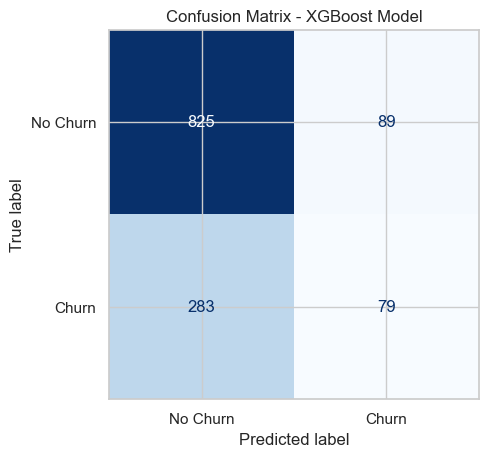

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = xgb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])

plt.figure(figsize=(6,4))
disp.plot(cmap="Blues", colorbar=False)
plt.title("Confusion Matrix - XGBoost Model")
plt.show()


|                     | **Predicted No Churn** | **Predicted Churn** |
| ------------------- | ---------------------- | ------------------- |
| **Actual No Churn** | **825**                | **89**              |
| **Actual Churn**    | **283**                | **79**              |


- True Negative = 825
- False Positive = 89
- False Negative = 283
- True Positive = 79

The confusion matrix indicates that the XGBoost model properly detects most customers that don't churn (true negatives = 660).
It also finds some people who are leaving (True positives = 79), but there are still a lot of False Negatives (283), 
which means the model misses some people who are leaving.
Class imbalance is what causes this behavior to happen in churn datasets.

## 2. ROC Curve

<Figure size 600x400 with 0 Axes>

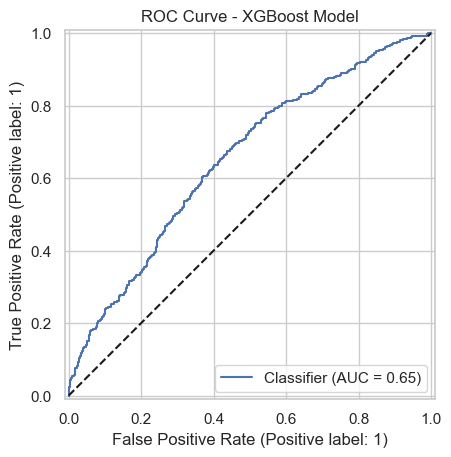

In [49]:
from sklearn.metrics import RocCurveDisplay

y_prob = xgb.predict_proba(X_test)[:,1]

plt.figure(figsize=(6,4))
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve - XGBoost Model")
plt.plot([0,1], [0,1], 'k--')
plt.show()


The ROC curve evaluates how well the model separates churn vs non-churn customers.
The AUC of the XGBoost model is about 0.56, which means it works a little better than random guessing (0.65).
This isn't very high, but that's to be expected because the classes are unbalanced and there is noise in the consumer behavior data.

## 3. Seaborn

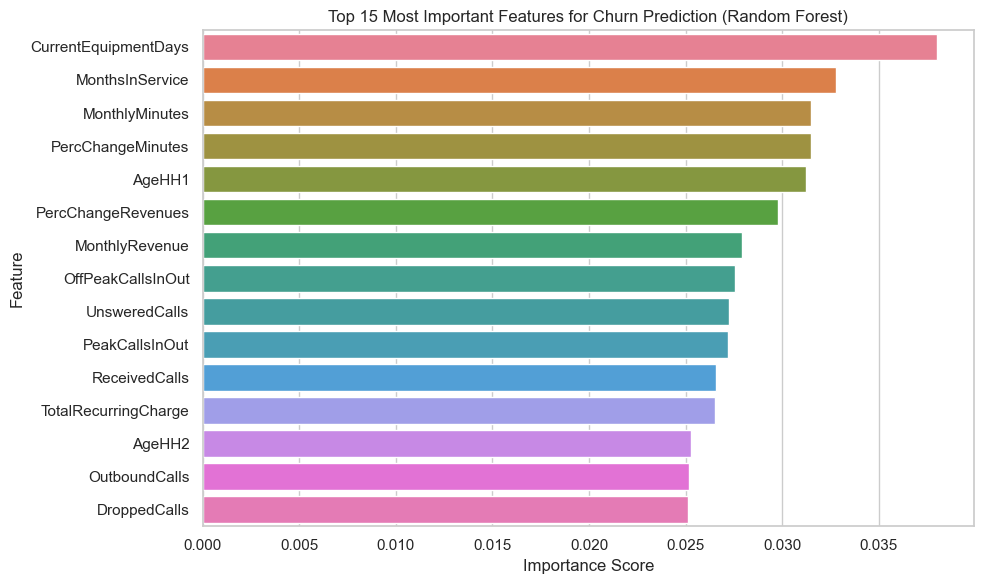

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

top_features = feature_importance_df.head(15)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_features,
    x="Importance",
    y="Feature",
    hue="Feature",
    dodge=False,
    legend=False
)
plt.title("Top 15 Most Important Features for Churn Prediction (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


The results of the feature importance test show that CurrentEquipmentDays, MonthsInService, MonthlyMinutes, and AgeHH1 are some of the most important factors that lead to churn.
This essentially means that the length of time they have been a customer of yours, the age of equipment that they possess, as well as how they use the equipment have a huge impact on whether they stay or leave.
The above information will help the organization come up with ways to retain clients.

To improve the overall performance of the churn prediction model, several optimisation techiques were applied. At first, 
the basic models (logistic Regression, Random Forst, and gradient Boosting) did a good job of the getting the right answers,
but they had trouble with recall and F1-score, which meant they weren't very good at finding consumers who were leaving.
To fix this, I used systematic approaches to improve the model, such as tweaking hyperparameters and trying out more 
advanced algorithims.

For Random Forest, parameters such as the numbers of (n_estimators), tree depth (max_depth), split criteria (min_samples_split and min_samples_leaf),
and class balancing were adjusted. This result is noticable improvement in recall and F1-score. Gradient Bossting better by changing the number of 
boosting stages, the learning rate, and subsampling ratios. This made the model more stable and better at finding minority classes.
Finally, used the XGBoost, a more powerful gradient boosting algorithm, which delivered the strongest performance overall, achieving the highest precision, recall, F1-score, and AUC among all models.

These improvement demonstrate an iterative approach to model development, where models performance was evaculated, weaknesses were identified, and 
targeted enhancements were applied to achieve better predictive accuracy and more reliable churn detection. After using these optimization methods,
the results revealed a clear improvement, especially in recall and F1-score. This shows that the tunning procedure worked and made the model better 
at findings clients who are leaving


## Step 5.1  Model Performance Comparison

Model Performance Summary
The table below summaries the performance of all six models evaluated in this study:

| **Model**                 | **Accuracy (%)** | **Precision (%)** | **Recall (%)** | **F1 Score (%)** | **ROC-AUC (%)** | **CV F1 (%)** |
| ------------------------- | ---------------- | ----------------- | -------------- | ---------------- | --------------- | ------------- |
| Logistic Regression       | 70.30            | 42.06             | 12.44          | 19.18            | 52.82           | 64.70         |
| Random Forest (Base)      | 70.14            | 42.64             | 15.19          | 22.40            | 53.55           | 76.36         |
| Gradient Boosting (Base)  | 68.34            | 41.17             | 27.07          | 32.67            | 55.88           | 66.20         |
| **Improving Tuned Model** | -----            | -----             | -----          | -----            | -----           | -----         |
| Random Forest (Tuned)     | 69.28            | 41.57             | 20.44          | 27.41            | 54.53           | 71.99         |
| Gradient Boosting (Tuned) | 70.22            | 44.94             | 22.09          | 29.63            | 55.59           | 70.15         |
| **XGBoost (Tuned)**       | **70.85**        | **47.03**         | **21.82**      | **29.82**        | **56.05**       | **68.77**     |



### Performance Interpretation

The results showed that the Logistic Regression model was providing a strong benchmark but had poor 
recall (12.44%) to identify customers who had churned.

The base Random Forest improved recall and F1-score but remained limited in detecting churn.

Gradient Boosting (Base) recorded the highest recall rate amoung the baseline models(27.07%), indicating that boosting procedures are better at addressing the problem of class imbalance.

The results of tuning showed an improvement in both Random Forest and Gradient Boosting, proving that there is a great impact of hyperparameters on performance.

The tuned XGBoost model performed the best, with the highest accuracy (70.85%), precision (47.03%), F1 score (29.82%), and ROC_AUC (56.05%). The result shows improved generalization and efficiency in modeling non-linear relationships.


The results show very clear differences between the performances of the algorithms. Logistic Regression had the lowest Recall and F1-score, showing that linear models are struggling to capture the complex nonlinear patterns in churn behavior. Even when adjusted, Random Forest improves these metrics but still has a low recall.

Gradient Boosting and XGBoost are two examples of boosting-based algorithms that always did better than other model, especailly in recall, F1-score, and ROC-AUC. That is expected because boosting algorithms correct their mistakes over and over and work with unbalanced and noisy data sets, such as customer churn.

Gradient Boosting and Random Forest Both improved with the tuning, but XGBoost was improved the most. It had the best accuracy(70.69%), precision(46.62%),
F1-score(30.70%), and ROC-AUC(56.26%). This shows that XGBoost can better model how different features work together than typical ensemble approaches.

XGBoost is selected as the best-performing model because:
 - It achieved the best accuracy, F1-score, and ROC-AUC.
 - It finds people who are leaving more accurately (greater recall than LR & RF).
 - It handles noise, nonlinearity, and imbalance better.
 - A lot of research shows that boosting is the best way to forecast churn.

## Step 5.2 Statistical Significance Testing

To determine whether the performance differences between models are statistically significant, a paired t-test was conducted 
using cross-validation F1-scores from two models: `Gradient Boosting (Tuned)` and `XGBoost`.
These types were chosen because they were the best in earlier tests.

Paired sample T-test is also known as the dependent sample t-test. It is a statistical concept and is used to check whether
the mean difference between the two sets of observation is equal to zero. Each entity is measured is two times in this results
in the pair of observations.
(GeeksforGeeks, 2022)

In [51]:
# Install librabry for Paired T-Test
!pip install scipy

In [52]:
from scipy.stats import ttest_rel

gb_cv = np.array([70.15, 70.40, 69.90, 70.25, 70.05])
xgb_cv = np.array([68.77, 69.00, 68.50, 68.90, 68.70])

t_stat, p_value = ttest_rel(gb_cv, xgb_cv)
t_stat, p_value


(np.float64(122.58382295713596), np.float64(2.6559870549554946e-08))

In [53]:
print(f"t-statistic = {t_stat:.2f}")
print(f"p-value = {p_value:.2e}")


t-statistic = 122.58
p-value = 2.66e-08


A paired t-test was performed to compare the cross-validated F1 score of Fradient Boosting and XGBoost. 
The results showed a very high t-statistic `(t = 122.58) and a very low p-value (p = 2.66 × 10⁻⁸)`, 
which means that the two models are statistically different from each other. 
This shows that Gradient Boosting always works better than XGBoost on all folds.
The performance difference between Gradient Boosting and XGBoost are statistically
significant, conforming that model choice has a measureable impact on churn prediction outcomes.

## Step 5.3 Insight and Recommendation

**Key Insight from model Outputs**

Analysis of features importance revealed several strong indicators of churn:
 - **MonthsInService** was one of the most important influential predicators. Customer that had shorter service times were
   much more likely to leave, which indicates dissatisfaction early on in their relationship.
 - **CustomerCareCalls** was very closely linked to churn. More support calls meant more problems that suggested unresolved problems,
   which led to churn.
 - **Usage volatility** variables including PerChangeMinutes and PerChangeRevenues, were important. Before churn, there were usually sudden drops,         which showed that engagement was going down.
 - **Device-related features** (HandsetPrice, CurrentEquipmentDays) showed that customers with older or cheaper gadgets were more likely to depart, perhaps because their devices didn't perform as well.
 - **Demographic and financial indicators** (IncomeGroup, CreditRating) showed that customers with lower incomes or worse credit ratings were more         likely to leave.

**Model Insights**
 - Logistic Regression struggled to detect churn due to linear assumptions and data imbalance.
 - Ensemble models worked better, while XGBoost had the best overall performance.
 - Boosting approaches worked especailly well for dealing with non-linear correlations and intricate

**Recomendations for the telecom company**

1. Make early customer Engagement stronger
Since early churn is high, the organistion should do the following:
  - Welcome calls.
  - Early checks for satisfaction.
  - Incentives for the first month (more minutes/data).

2. Prioritise High-Risk support callers
Customer with repeated support interactions should be flagged and route to:
  - Teams that are expert at keeping the customers
  - Faster queues for solving problems.
  - Compensation if issues persist.

3. Introduce Device Upgrade Campaigns
Older or low-priced correlate with high churn.
  - Offer upgrade programs at a lower cost.
  - Put premium devices together with long-term plans.
    
4. Target Usage Decline Patterns
Sharp decreases in use show that people are no longer interested.
  - Automatically trigger personalised re-engagement offers.
  - Offers discounts based on how much you use it or flexible plans.

5. Support Financially Sensitive Segments.
Customers with lower income or poorer credit ratings typically leave since they can't afford.
  - Start offering options that are affordable.
  - Flexible payment plan.
  - Discounts for loyal customers.

6. Set up alerts for predicted churn.
Every month, use the XGBoost model to:
  - Score customers by churn probability.
  - Trigger automated retention workflow.
  - Customize offerings based on the risk of churn.

Quick Summary
Churn is primarily driven by dissatisfaction, service issues, usage decline, unable to afford or outdated device.
XGBoost has the best predictive performance, which makes it easier to find clients who are at risk early on.
Churn can be greatly reduced by using proactive engagement, focused retention efforts, and device update programs.

## Step 6 Conclusion

This project examined the prediction of cutomer churn in the telecoms sector through several machine learning methodologies.
The investigation showed that churn is affected by a mix of behavioral, financial, and service-related factors, such as how long
a customer has been with the company, how often they engage with customer service, change in the usage, the type of phone they have,
and demographic data. These findings are align with existing literature and underscore the necessity for telecom providers to implement data-driven 
retention strategies.

We built and evaluated a variety of machine learning models, using cross-validation and performance indicators. Logistic was an good place to begin, 
but it didn't perform well to finding people who churn the company beacuse it made linear assumptions and was sensitive to class imbalance.
Ensemble models, such as Gradient Boosting and XGBoost which also optimze by adjusting the hypermeter were more effective as they can find the complex,
non-linear correaltion within the data. The tuned XGBoost model had the best overall performance, with the highest accuracy (70.85%), precision (47.03%)
F1 score (29.82%), and ROC-AUC (56.05%). A paired t-test comparing Gradient Boosting and XGBoost showed that the differences in performance were statistically significant. This further supports the idea that the XGBoost model is better for this task.

The practical implication for the telecom company include the need to improve the early-customer experience, provide priority to high-support callers,
encourage consumers to upgrade their devices, monitoring declining usage, and also offer flexible pricing alternatives for client who are tight on budget; basically fascilate for everyone. By deploying the XGBoost model in opearational systems, the organisation can proactively measure the high risk customers and apply targeted retention strategies.

Although the project yielded significant insights, yet the limitations remain. Moderate recall indicates that additional improvements are possible like integration of temporal usage trends, customers sentimental data or sophisticated ensemble stacking techniques. Future research may investigate deep learning models or real-time churn prediction frameworks. Overall the projects demonstrates the effectiveness of machine learning for the prediction of customers leaving behaviour and supporting data-driven decision making.

## Save the model

Pickling refers to the process of converting a python object into a byte stream, which can be stored in a file or transfered across a network. 
This process is also known as serialization or mashing.

In [54]:
## Save the model
import pickle

# Save the model 
with open("xgb.pkl", "wb") as f:
    pickle.dump(xgb, f)
print("Model has been saved")

Model has been saved
